# Austin Bikeshare Project

## Goals

- Identify the optimal time window for performing station and bicycle maintenance that minimizes disruption to bikeshare operations, based on usage patterns across different hours of the day.

- Uncover and present additional meaningful insights from the dataset that could support operational decisions or improve the overall efficiency of the bikeshare system.



In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier

import pickle


In [3]:
df = pd.read_csv('bikeshare_station.csv')
df1 = pd.read_csv('bikeshare_trips.csv') 

df.head()

,station_id,name,status,location,address,alternate_name,city_asset_number,property_type,number_of_docks,power_type,footprint_length,footprint_width,notes,council_district,image,modified_date
0,1007,Lavaca & 6th,closed,"(30.26889, -97.74525)",601 Lavaca St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,2021-01-04 00:00:00.000000 UTC
1,1008,Nueces @ 3rd,closed,"(30.26694, -97.74939)",311 Nueces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,2021-01-04 00:00:00.000000 UTC
2,2500,Republic Square,closed,"(30.26751, -97.74802)",425 W 4th Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,2021-01-04 00:00:00.000000 UTC
3,2502,Barton Springs & Riverside,closed,"(30.2587, -97.74872)",400 Barton Springs Rd.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moved to Pedernales/2nd. Original city ID: 16729,9,NaN,2021-01-04 00:00:00.000000 UTC
4,2536,Waller & 6th St.,closed,"(30.26461, -97.73049)",602 Waller St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2021-01-04 00:00:00.000000 UTC


In [4]:
print(df.info())
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         101 non-null    int64  
 1   name               101 non-null    object 
 2   status             101 non-null    object 
 3   location           101 non-null    object 
 4   address            100 non-null    object 
 5   alternate_name     2 non-null      object 
 6   city_asset_number  77 non-null     float64
 7   property_type      82 non-null     object 
 8   number_of_docks    82 non-null     float64
 9   power_type         82 non-null     object 
 10  footprint_length   79 non-null     float64
 11  footprint_width    79 non-null     float64
 12  notes              32 non-null     object 
 13  council_district   101 non-null    int64  
 14  image              0 non-null      float64
 15  modified_date      101 non-null    object 
dtypes: float64(5), int64(2), o

In [5]:
# Remove parentheses and split into new columns
df[['latitude', 'longitude']] = df['location'].str.strip("()").str.split(", ", expand=True)

# Convert to float
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

df.head()

,station_id,name,status,location,address,alternate_name,city_asset_number,property_type,number_of_docks,power_type,footprint_length,footprint_width,notes,council_district,image,modified_date,latitude,longitude
0,1007,Lavaca & 6th,closed,"(30.26889, -97.74525)",601 Lavaca St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,2021-01-04 00:00:00.000000 UTC,30.26889,-97.74525
1,1008,Nueces @ 3rd,closed,"(30.26694, -97.74939)",311 Nueces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,2021-01-04 00:00:00.000000 UTC,30.26694,-97.74939
2,2500,Republic Square,closed,"(30.26751, -97.74802)",425 W 4th Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,2021-01-04 00:00:00.000000 UTC,30.26751,-97.74802
3,2502,Barton Springs & Riverside,closed,"(30.2587, -97.74872)",400 Barton Springs Rd.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moved to Pedernales/2nd. Original city ID: 16729,9,NaN,2021-01-04 00:00:00.000000 UTC,30.25870,-97.74872
4,2536,Waller & 6th St.,closed,"(30.26461, -97.73049)",602 Waller St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2021-01-04 00:00:00.000000 UTC,30.26461,-97.73049


In [12]:
fig = px.scatter_map(
    df,
    lat="latitude",
    lon="longitude",
    color="status",
    hover_name="name",hover_data=['property_type'],
    zoom=3,
    height=500,
    map_style="carto-positron"
)

fig.show()

     year  month  row_count
109  2023      1        641
110  2023      2        551
111  2023      3        816
112  2023      4        746
113  2023      5        557
114  2023      6        449
115  2023      7        462
116  2023      8        582
117  2023      9        957
118  2023     10       1117
119  2023     11        724
120  2023     12        506
     year  month  row_count
97   2022      1        369
98   2022      2        581
99   2022      3        756
100  2022      4       1001
101  2022      5        729
102  2022      6        531
103  2022      7        543
104  2022      8        690
105  2022      9       1123
106  2022     10       1186
107  2022     11        698
108  2022     12        509


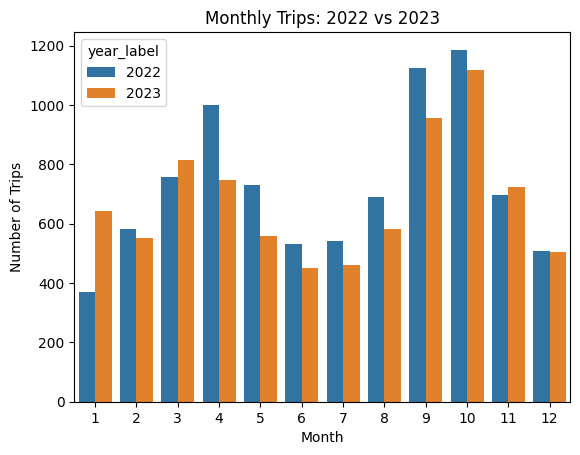

In [30]:
df1['start_time'] = pd.to_datetime(df1['start_time'])

df1['year'] = df1['start_time'].dt.year
df1['month'] = df1['start_time'].dt.month

monthly_trip_df = df1.groupby(['year', 'month']).size().reset_index(name='row_count')

monthly_trip_2023_df = monthly_trip_df[monthly_trip_df['year'] == 2023]
monthly_trip_2022_df = monthly_trip_df[monthly_trip_df['year'] == 2022]

print(monthly_trip_2023_df)
print(monthly_trip_2022_df)

monthly_both = pd.concat([
    monthly_trip_2022_df.assign(year_label='2022'),
    monthly_trip_2023_df.assign(year_label='2023')
])

sns.barplot(
    data=monthly_both,
    x='month',
    y='row_count',
    hue='year_label',
    dodge=True
)
plt.title('Monthly Trips: 2022 vs 2023')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.show()


In [ ]:
# Calculate trip duration in minutes and eliminate outliers
df1.head()
np.average(df1['duration_minutes'])
df1['duration_minutes'].describe()

Q1 = df1['duration_minutes'].quantile(0.25)
Q3 = df1['duration_minutes'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = df1[(df1['duration_minutes'] < lower_limit) | (df1['duration_minutes'] > upper_limit)]
df1['duration_capped'] = df1['duration_minutes'].clip(lower=lower_limit, upper=upper_limit)
df1['duration_capped'].describe()


count    63657.000000
mean        19.044190
std         17.553671
min          2.000000
25%          6.000000
50%         12.000000
75%         27.000000
max         58.500000
Name: duration_capped, dtype: float64

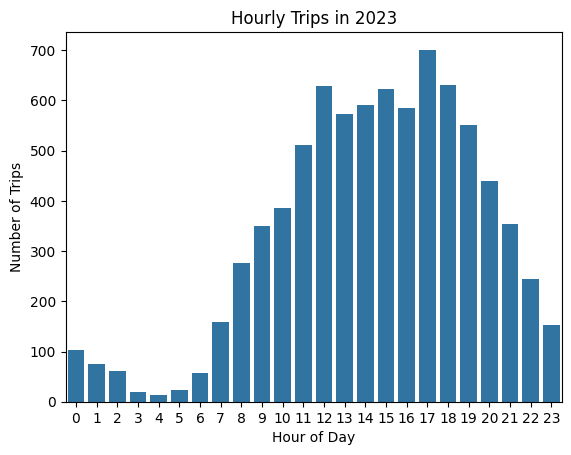

In [50]:
# Extract hour from start_time only for trips in 2023 and create a plot
df1['start_hour'] = df1['start_time'].dt.hour
df1_2023 = df1[df1['year'] == 2023]
hourly_trip_2023_df = df1_2023.groupby('start_hour').size().reset_index(name='row_count')
sns.barplot(
    data=hourly_trip_2023_df,
    x='start_hour',
    y='row_count'
)
plt.title('Hourly Trips in 2023')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

## Conclusion
- Stakeholders are looking for the best time to service their station and bicycles with minimal interruption on the bikeshare service are between 12am-6am. 

- It seems the sharebike seasons have less trips during December to February and June to July in 2022 and 2023 data. It could be due to the seasons and weather, in which need further weather data to validate the trend.

- The station status whether is closed were seems to be random, it would be best to further understand the data from data source.

## Next step:
- Incorporate weather data (e.g., temperature, rainfall, snow) to validate the seasonal usage pattern observed between December–February and June–July.

- Perform clustering or anomaly detection on station closure patterns to identify if there are hidden trends or specific locations/times with higher closure frequency.

- Run service downtime simulations during 12am–6am to quantify potential trip impact, ensuring minimal disruption during maintenance windows.